### We're working on a dataset which has hidden details or anonymous columns about the credit card user with only time and amount columns known which act as Independent columns where Class column which says fraud or not fraud is our target variable.

## Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset

In [ ]:
df = pd.read_csv('creditcard.csv')

### **Observation:** we can see some anonymous columns in the dataset which specify hidden information about the credit card customers like transaction id which are scaled to hide the actual data to protect the privacy of the customer.

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
53566,46047,-2.885416,-2.647887,1.903441,3.726885,3.800798,-1.644480,-1.924198,0.707696,-1.070468,1.025229,0.590276,0.531855,-0.873510,0.284279,-2.075755,0.588081,-0.515094,-0.437550,-1.863019,0.619500,0.284893,-0.268122,0.977417,0.136853,-1.144367,-0.535616,0.098494,0.305740,19.02,0.0
53567,46048,1.061410,0.045830,0.970401,1.102883,-0.490685,0.219968,-0.424285,0.235960,0.016498,0.116565,1.531313,1.074447,0.154534,0.294224,0.747177,0.415745,-0.593013,0.065704,-0.611904,-0.092446,0.033158,0.067127,0.053801,-0.010221,0.209877,-0.484136,0.057583,0.028018,28.70,0.0
53568,46048,-0.202740,0.295074,1.924698,1.009344,-0.235931,-0.272232,0.261015,-0.162146,-0.583849,0.361002,1.691854,0.931361,0.959252,-0.052824,1.124789,-0.237540,-0.265445,0.732205,1.543658,0.457057,0.321731,1.056540,0.093902,0.608566,-0.931546,0.466156,0.016695,-0.024568,54.81,0.0
53569,46048,-0.730116,0.796820,2.122484,-1.318082,0.019762,-0.857857,0.975752,-0.399896,0.359189,-0.053961,0.495669,0.292872,0.293502,-0.570330,0.745738,-0.056366,-0.444837,-1.099107,-1.270100,0.277419,-0.149736,0.093479,-0.056586,0.650087,-0.473889,0.662115,0.060486,-0.208536,4.53,0.0
53570,46050,0.791672,-0.522991,0.036747,1.204803,-0.262390,-0.056153,0.263614,-0.130209,0.125423,-0.095990,-1.230483,0.060346,0.612806,0.154641,1.168423,0.677741,-0.927278,0.245778,-0.173554,0.435643,0.013131,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(11959, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [ ]:
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,8009.996822,-0.216230,0.277097,0.889505,0.282606,-0.086585,0.139986,-0.121943,-0.048727,0.911579,-0.285865,0.820266,-1.442642,0.934682,0.782071,-0.179180,-0.024968,0.379550,-0.022419,-0.065877,0.022534,-0.061474,-0.153850,-0.033709,0.017113,0.104794,0.062891,0.008320,0.000271,62.352617,0.004349
std,6204.332248,1.583914,1.308884,1.331824,1.478162,1.191776,1.306285,1.153899,1.246823,1.192349,1.173549,1.183516,1.542860,1.185540,1.297608,0.985644,0.926829,1.106732,0.827064,0.825127,0.575860,0.918705,0.626631,0.505355,0.591394,0.429413,0.561603,0.405100,0.261230,178.247010,0.065803
min,0.000000,-27.670569,-34.607649,-22.804686,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,-14.166795,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.276034,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2542.000000,-0.978944,-0.261503,0.417186,-0.622456,-0.688114,-0.622521,-0.591335,-0.185243,0.196741,-0.734696,0.013157,-2.434287,0.096362,0.181975,-0.773601,-0.510494,-0.104358,-0.463891,-0.554455,-0.155358,-0.268151,-0.543613,-0.171833,-0.333251,-0.144092,-0.353864,-0.080064,-0.015461,5.000000,0.000000
50%,6662.000000,-0.340742,0.256346,0.951223,0.213029,-0.183847,-0.146903,-0.094876,0.013616,0.894911,-0.361219,0.771773,-1.778586,1.015535,1.047427,-0.042979,0.051214,0.372768,0.031698,-0.064862,-0.031566,-0.130062,-0.124900,-0.044299,0.072099,0.143136,0.001972,-0.003039,0.015452,15.950000,0.000000
75%,12382.000000,1.161273,0.883626,1.613678,1.159141,0.346298,0.508432,0.431657,0.267560,1.589120,0.147961,1.631154,-0.131637,1.821011,1.530422,0.505024,0.542400,0.863136,0.477780,0.462036,0.147281,0.021687,0.234029,0.075686,0.401798,0.380076,0.409231,0.106344,0.073171,50.000000,0.000000
max,20642.000000,1.960497,9.092123,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.816252,9.253526,4.295648,4.555359,8.012574,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


## Value_Counts

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Time: [    0     1     2 ... 20636 20638 20642]
V1: [-1.35980713  1.19185711 -1.35835406 ... -6.30501183  1.16196008
  1.29109584]
V2: [-0.07278117  0.26615071 -1.34016307 ...  3.94488551 -0.3982971
 -0.22662822]
V3: [ 2.53634674  0.16648011  1.77320934 ... -4.70736203  1.12373185
  0.70838576]
V4: [ 1.37815522  0.44815408  0.37977959 ...  1.53960246 -0.47423668
 -0.71923631]
V5: [-0.33832077  0.06001765 -0.50319813 ... -3.93478538 -1.22666718
 -0.6590992 ]
V6: [ 0.46238778 -0.08236081  1.80049938 ... -1.73056473 -0.51932469
 -0.27375652]
V7: [ 0.23959855 -0.07880298  0.79146096 ... -2.10493583 -0.8041787
 -0.61204158]
V8: [ 0.0986979   0.08510165  0.24767579 ...  3.8434472   0.07013374
 -0.11148849]
V9: [ 0.36378697 -0.25542513 -1.51465432 ...  0.86345844  3.26292614
  3.03225757]
V10: [ 0.09079417 -0.16697441  0.20764287 ...  0.2555736  -1.46438935
 -1.47896497]
V11: [-0.55159953  1.61272666  0.62450146 ... -0.57845576  0.81481799
 -0.0944031 ]
V12: [-0.61780086  1.06523531  0.066083

In [ ]:
for col in list(df):
    print(col, df[col].nunique())

Time 26671
V1 52398
V2 52398
V3 52398
V4 52398
V5 52398
V6 52398
V7 52398
V8 52398
V9 52398
V10 52398
V11 52398
V12 52398
V13 52398
V14 52398
V15 52398
V16 52398
V17 52398
V18 52398
V19 52398
V20 52398
V21 52398
V22 52398
V23 52398
V24 52398
V25 52398
V26 52398
V27 52398
V28 52398
Amount 13274
Class 2


### Let's see value counts for our target variable

In [ ]:
df.Class.value_counts()

0.0    53417
1.0      153
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


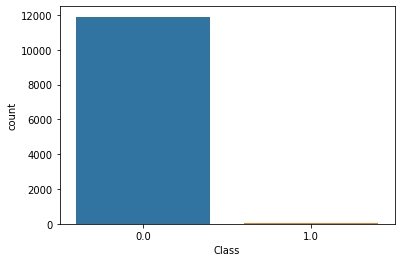

In [ ]:
sns.countplot(df['Class'])

## Missing Values

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

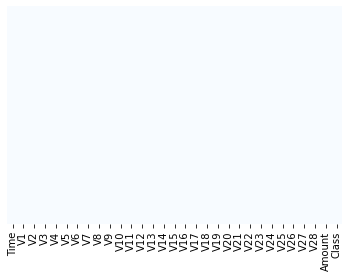

In [ ]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'Blues')

## Duplicated Values

In [ ]:
df.duplicated().sum()

234

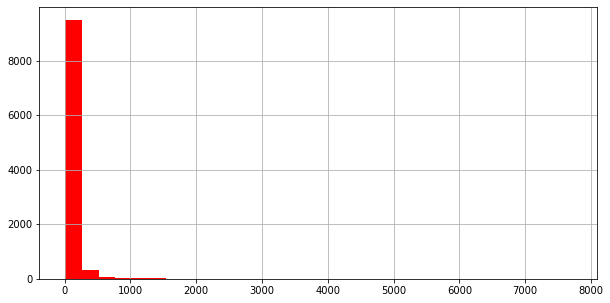

In [ ]:
df.Amount.hist(bins=30, figsize = (10,5), color = 'r')
plt.show()

## Dividing the data into X and Y

In [ ]:
#### Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

### Splitting the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



## Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
y_pred=log.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16018    10]
 [   23    20]]
0.997946611909651
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16028
         1.0       0.67      0.47      0.55        43

    accuracy                           1.00     16071
   macro avg       0.83      0.73      0.77     16071
weighted avg       1.00      1.00      1.00     16071



### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
log = LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [ ]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [ ]:
logh=GridSearchCV(log,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
logh.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

### Confusion Matrix and Classification Report

In [ ]:
y_pred=logh.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16014    14]
 [   23    20]]
0.997697716383548
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16028
         1.0       0.59      0.47      0.52        43

    accuracy                           1.00     16071
   macro avg       0.79      0.73      0.76     16071
weighted avg       1.00      1.00      1.00     16071



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Confusion Matrix and Classification Report

In [ ]:
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16024     4]
 [    3    40]]
0.9995644328293198
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16028
         1.0       0.91      0.93      0.92        43

    accuracy                           1.00     16071
   macro avg       0.95      0.96      0.96     16071
weighted avg       1.00      1.00      1.00     16071



### Under Sampling

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0.0: 37389, 1.0: 110})

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

The number of classes before fit Counter({0.0: 37389, 1.0: 110})
The number of classes after fit Counter({0.0: 137, 1.0: 110})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[15741   287]
 [    3    40]]
0.9819550743575384
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     16028
         1.0       0.12      0.93      0.22        43

    accuracy                           0.98     16071
   macro avg       0.56      0.96      0.60     16071
weighted avg       1.00      0.98      0.99     16071



### Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0.0: 37389, 1.0: 110})
The number of classes after fit Counter({0.0: 37389, 1.0: 28041})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16025     3]
 [    5    38]]
0.9995022089477942
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16028
         1.0       0.93      0.88      0.90        43

    accuracy                           1.00     16071
   macro avg       0.96      0.94      0.95     16071
weighted avg       1.00      1.00      1.00     16071



### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
os=SMOTE(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0.0: 37389, 1.0: 110})
The number of classes after fit Counter({0.0: 37389, 1.0: 28041})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16022     6]
 [    5    38]]
0.999315537303217
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16028
         1.0       0.86      0.88      0.87        43

    accuracy                           1.00     16071
   macro avg       0.93      0.94      0.94     16071
weighted avg       1.00      1.00      1.00     16071



### Thank You!